In [1]:
# Nama : Latifatuzikra Suhairi
# Kelas : ASIMO
# Topik : Domain Data Science

# Problem Scoping

Latar Belakang :
- IPM (Indeks Pembangunan Manusia) sebagai indicator untuk mengukur keberhasilan dalam upaya membangun kualitas hidup manusia.
- IPM menurut BPS dibagi menjadi 4 kategori yaitu rendah/low, sedang/normal, tinggi/high, dan sangat tinggi/very-high.
- Komponen IPM terdiri dari bidang pendidikan, kependudukan, dan kesehatan.
- Komponen tersebut akan menjadi nilai penentu kategori Indeks Pembangunan Manusia di suatu wilayah.
- Untuk mempercepat penentuan Indeks Pembangunan Manusia, dibutuhkan pemodelan yang mampu mengklasifikan IPM dengan mudah dan akurasi yang baik. 
- Dalam tugas ini, model akan dibangun menggunakan algoritma SVM dan KNN.

Rumusan Masalah: Bagaimana perbandingan model klasifikasi Indeks Pembangunan Manusia menggunakan algoritma SVM dan KNN? 

## Data Acquisition

#### Import Library

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

#### Membaca dataset

In [50]:
df = pd.read_excel('IPM.xlsx')
df[['Harapan_Lama_Sekolah', 'Pengeluaran_Perkapita', 'Rerata_Lama_Sekolah', 'Usia_Harapan_Hidup', 'IPM']] = df['Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM'].str.split(',', expand=True)
df = df.drop(['Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM'], axis=1)
df

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.9,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.6,8180,8.88,64.4,Normal
4,14.01,8030,9.67,68.22,Normal
...,...,...,...,...,...
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.3,70.15,High


## Data Exploration

#### Informasi umum data

In [4]:
#mendapatkan dimensi dataset
df.shape

(2196, 5)

Dimensi dari dataset adalah 2196 baris dengan 5 kolom

In [5]:
#mendapatkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Harapan_Lama_Sekolah   2196 non-null   object
 1   Pengeluaran_Perkapita  2196 non-null   object
 2   Rerata_Lama_Sekolah    2196 non-null   object
 3   Usia_Harapan_Hidup     2196 non-null   object
 4   IPM                    2196 non-null   object
dtypes: object(5)
memory usage: 85.9+ KB


Dikarenakan tipe data masing-masing kolom belum sesuai, sehingga perlu diubah tipe datanya. Column indeks 0,2,3 diubah ke tipe float, indeks 1 bertipe int, indeks 4 tetap object

In [6]:
#mengubah tipe data masing-masing column
df[['Harapan_Lama_Sekolah', 'Rerata_Lama_Sekolah', 'Usia_Harapan_Hidup']] = df[['Harapan_Lama_Sekolah', 'Rerata_Lama_Sekolah', 'Usia_Harapan_Hidup']].astype(float)
df['Pengeluaran_Perkapita'] = df['Pengeluaran_Perkapita'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int32  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int32(1), object(1)
memory usage: 77.3+ KB


In [7]:
df.describe()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
count,2196.000000,2196.000000,2196.000000,2196.000000
mean,12.931498,10323.144353,8.291585,69.467418
std,1.312967,2664.738311,1.611256,3.437536
min,2.950000,3975.000000,0.850000,54.820000
25%,12.350000,8599.750000,7.390000,67.210000
50%,12.860000,10192.500000,8.180000,69.785000
75%,13.570000,11670.500000,9.180000,71.712500
max,17.800000,23888.000000,12.830000,77.730000


#### Memeriksa nilai missing dan duplikat

In [8]:
# missing value
df.isnull().sum()

Harapan_Lama_Sekolah     0
Pengeluaran_Perkapita    0
Rerata_Lama_Sekolah      0
Usia_Harapan_Hidup       0
IPM                      0
dtype: int64

Tidak ada missing value pada dataset

In [9]:
# duplikat
df.duplicated().sum()

0

Tidak ada data yang duplikat pada dataset

#### Visualisasi Data

Dapat dilihat pada dataframe bahwa column IPM merupakan data kategorikal, sehingga bisa kita lihat nilai unique dari kolom tersebut.

In [10]:
df['IPM'].unique()

array(['High', 'Normal', 'Very-High', 'Low'], dtype=object)

Terdapat 4 nilai unique pada kolom IPM yaitu: 'High', 'Normal', 'Very-High', 'Low'

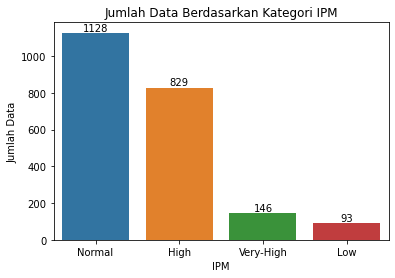

In [11]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = 'IPM', data = df, order = df['IPM'].value_counts().index)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Jumlah Data Berdasarkan Kategori IPM')
plt.ylabel('Jumlah Data')
plt.xlabel('IPM')
plt.show()

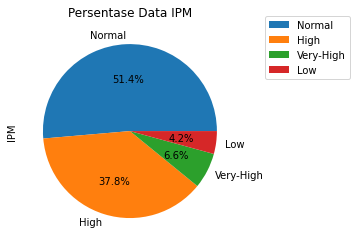

In [12]:
plt.figure(figsize=(6,4))
df['IPM'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Persentase Data IPM')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

- Dari visualisasi diatas, distribusi data pada masing-masing kategori IPM masih imbalance
- Data IPM yang memiliki kelas terbanyak adalah tingkat indeks pembangunan normal, yang paling sedikit adalah tingkat indeks pembangunan normal low

<AxesSubplot:xlabel='Harapan_Lama_Sekolah'>

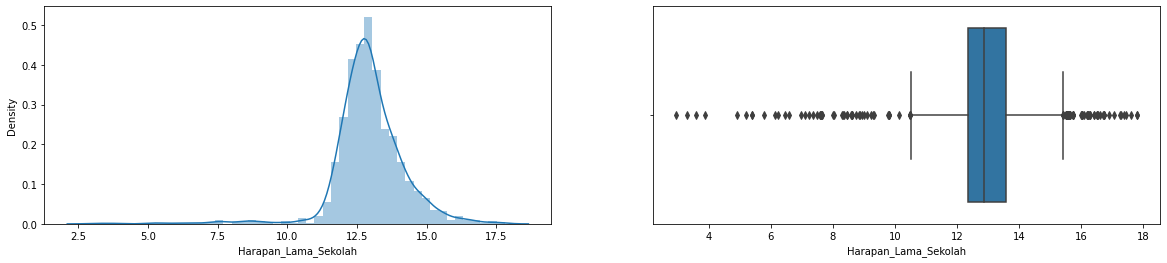

In [13]:
#Density
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['Harapan_Lama_Sekolah'])
f.add_subplot(1,2,2)
sns.boxplot(x=df["Harapan_Lama_Sekolah"] )

- Dari distplot dapat dilihat bahwa density dari data Harapan Lama Sekolah terletak di kisaran angka 12.5-13 
- Masih banyak outlier pada data ini

<AxesSubplot:xlabel='Pengeluaran_Perkapita'>

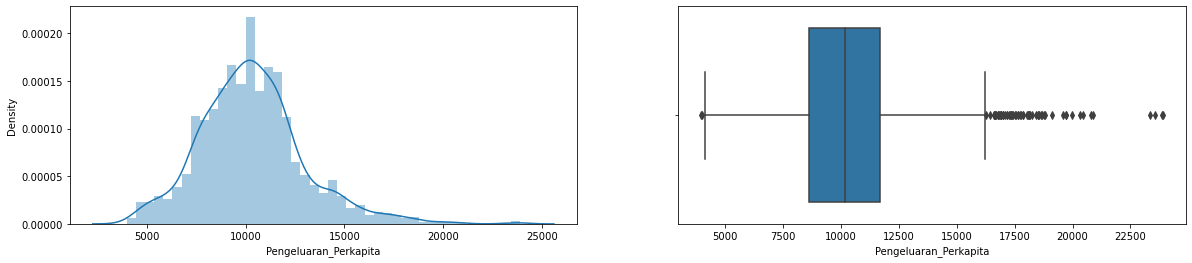

In [14]:
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['Pengeluaran_Perkapita'])
f.add_subplot(1,2,2)
sns.boxplot(x=df["Pengeluaran_Perkapita"])

- Dari distplot dapat dilihat bahwa density dari data Pengeluaran Perkapita terletak di kisaran angka 9000-13000
- Masih banyak outlier pada data ini yaitu lebih dari 16000

<AxesSubplot:xlabel='Rerata_Lama_Sekolah'>

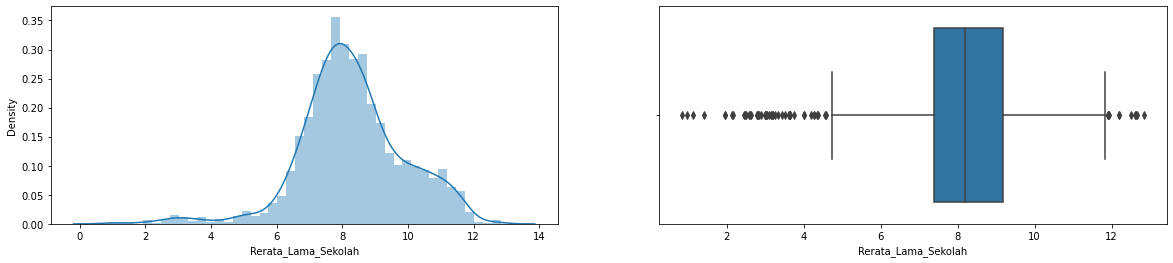

In [15]:
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['Rerata_Lama_Sekolah'])
f.add_subplot(1,2,2)
sns.boxplot(x=df["Rerata_Lama_Sekolah"] )

- Dari distplot dapat dilihat bahwa density dari data Rerata Lama Sekolah terletak di kisaran angka 7-9 tahun
- Masih banyak outlier pada data ini yang kecil dari 4 tahun dan besar dari 12 tahun

<AxesSubplot:xlabel='Usia_Harapan_Hidup'>

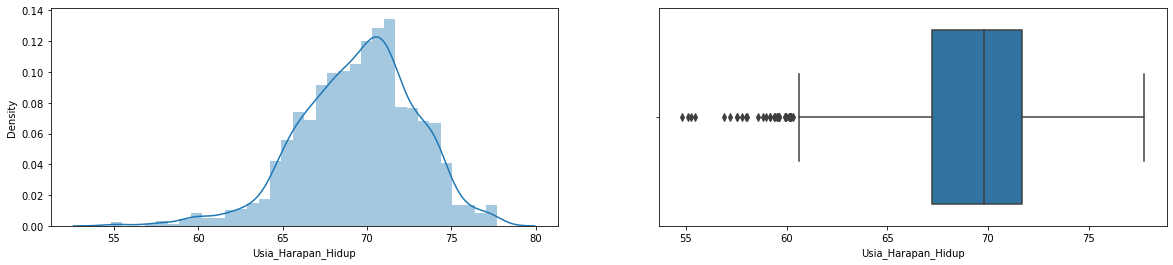

In [16]:
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['Usia_Harapan_Hidup'])
f.add_subplot(1,2,2)
sns.boxplot(x=df["Usia_Harapan_Hidup"] )

- Dari distplot dapat dilihat bahwa density dari data Usia Harapan Hidup terletak di kisaran angka 70-72
- Masih banyak outlier pada data ini yaitu kecil dari 60 

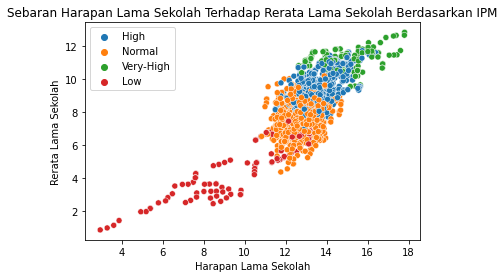

In [17]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Harapan_Lama_Sekolah', y='Rerata_Lama_Sekolah', data=df, hue='IPM')
plt.title('Sebaran Harapan Lama Sekolah Terhadap Rerata Lama Sekolah Berdasarkan IPM')
plt.xlabel('Harapan Lama Sekolah')
plt.ylabel('Rerata Lama Sekolah')
plt.legend()
plt.show()

Visualisasi diatas menunjukkan sebaran Harapan Lama Sekolah Terhadap Rerata Lama Sekolah Berdasarkan IPM. Dari visualisai tersebut dapat dilihat bahwa semakin besar nilai variabel harapan lama sekolah, semakin besar pula nilai rerata sekolah. Artinya, kedua variabel ini memiliki hubungan linear positif (karena juga membentuk garis linear). Kemudian, bila diperhatikan berdasarkan klasifikasi IPM, sebaran data sudah berada pada satu-satu wilayah klasifikasi, yang menandakan bahwa data klasifikasi cukup akurat.

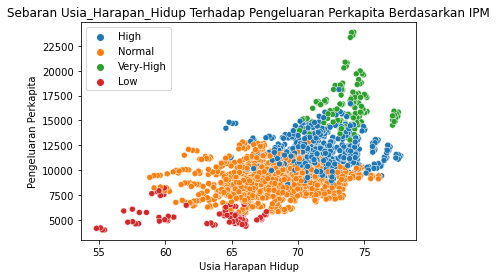

In [47]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Usia_Harapan_Hidup', y='Pengeluaran_Perkapita', data=df, hue='IPM')
plt.title('Sebaran Usia_Harapan_Hidup Terhadap Pengeluaran Perkapita Berdasarkan IPM')
plt.xlabel('Usia Harapan Hidup')
plt.ylabel('Pengeluaran Perkapita')
plt.legend()
plt.show()

Visualisasi diatas menunjukkan sebaran Usia Harapan Hidup Terhadap Pengeluaran Per Kapita Berdasarkan IPM. Dari visualisai tersebut dapat dilihat bahwa semakin besar nilai variabel Usia Harapan Hidup, semakin besar pula nilai Pengeluaran Per Kapita. Artinya, kedua variabel ini memiliki hubungan linear positif (karena juga membentuk garis linear). Kemudian, bila diperhatikan berdasarkan klasifikasi IPM, sebaran data sudah berada pada satu-satu wilayah klasifikasi, yang menandakan bahwa data klasifikasi cukup akurat.

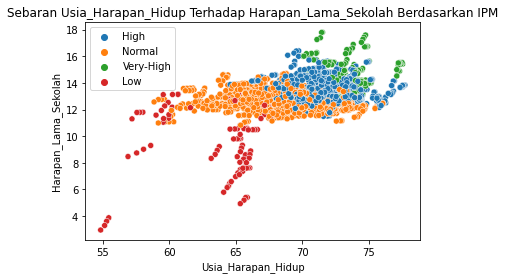

In [48]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Usia_Harapan_Hidup', y='Harapan_Lama_Sekolah', data=df, hue='IPM')
plt.title('Sebaran Usia_Harapan_Hidup Terhadap Harapan_Lama_Sekolah Berdasarkan IPM')
plt.xlabel('Usia_Harapan_Hidup')
plt.ylabel('Harapan_Lama_Sekolah')
plt.legend()
plt.show()

Visualisasi diatas menunjukkan sebaran Usia Harapan Hidup Terhadap Harapan Lama Sekolah Berdasarkan IPM. Dari visualisai tersebut dapat dilihat bahwa semakin besar nilai variabel Usia Harapan Hidup, semakin besar pula nilai Harapan_Lama_Sekolah. Artinya, kedua variabel ini memiliki hubungan linear positif (karena juga membentuk garis linear). Namun, hubungan antar dua variabel ini tidak begitu kuat karena kemiringan linearnya tidak terlalu diagonal.

Setelah mengetahui bahwa column IPM memiliki data kategorikal yaitu High, Normal, Very High, dan Low. Data ini kemudian akan di encoding

In [20]:
ipm_data = df.copy()

ipm_data['IPM'] = ipm_data['IPM'].replace({'Low':'0', 'Normal': '1',
                                           'High': '2', 'Very-High': '3'}).astype(int)
ipm_data.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,2
1,13.90,7148,9.48,65.28,1
2,14.32,8776,8.68,67.43,1
3,14.60,8180,8.88,64.40,1
4,14.01,8030,9.67,68.22,1


Data di encode karena model mampu mempelajari class dengan mudah dengan pengkodean numerik, bukan string. Dari hasil encode diatas, telah dikodekan IPM yang berupa object menjadi data numerikal dimana: 'Low':'0', 'Normal': '1', 'High': '2', 'Very-High': '3'

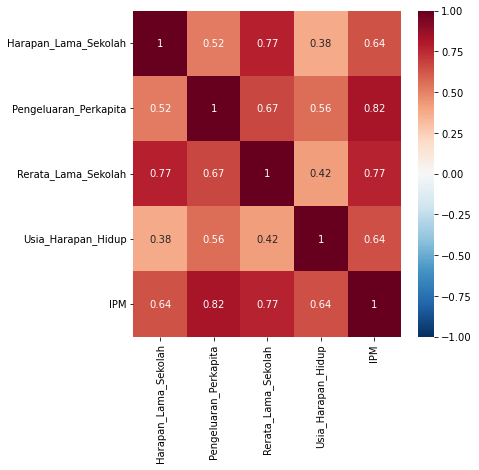

In [21]:
corr = ipm_data.corr(method="pearson")
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

Perhitungan korelasi digunakan untuk mengetahui bagaimana hubungan antar variabel. Fokus disini adalah melihat bagaiamana hubunga korelasi variabel Harapan_Lama_Sekolah, Pengeluaran_Perkapita Rerata_Lama_Sekolah, Usia_Harapan_Hidup dengan IPM. Berdasarkan matriks korelasi diatas, dapat dilihat bahwa Pengeluaran Per Kapita memiliki hubungan linear positif paling kuat dengan IPM, yaitu sebesar 82%. Kemudian, dilanjutkan dengan Rerata Lama Sekolah 77%, dan Usia Harapan Hidup dan Harapan Lama Sekolah sebesar 64%. Hubungan linear positif mengartikan bahwa apabila nilai variabel 1 naik, makan nilai variabel 2 juga akan naik, dsb.

Kemudian, bisa dilihat juga hubungan korelasi antar variabel Harapan_Lama_Sekolah, Pengeluaran_Perkapita Rerata_Lama_Sekolah, Usia_Harapan_Hidup. Variabel yang memiliki korelasi paling kuat adalah Rerata lama sekolah dengan harapan lama sekolah = 77% dan yang paling lemah adalah usia harapan hidup dengan harapan lama sekolah = 38%.

Dengan demikian, dikarenakan variabel Harapan_Lama_Sekolah, Pengeluaran_Perkapita Rerata_Lama_Sekolah, Usia_Harapan_Hidup memiliki hubungan yang cukup kuat-hingga kuat terhadap variabel IPM, sehingga keempat variabel akan digunakan sebagai variabel feature yang akan mempengaruhi nilai IPM, selanjutnya akan dijadikan untuk pembangunan model.

#### Data feature dan target

In [22]:
x = ipm_data.drop(["IPM"], axis=1).to_numpy()
y = ipm_data['IPM'].to_numpy()

Berdasarkan matriks korelasi diatas, dikarenakan 4 variabel yaitu: Harapan_Lama_Sekolah, Pengeluaran_Perkapita	Rerata_Lama_Sekolah, Usia_Harapan_Hidup memiliki korelasi linear positif kepada variabel IPM (Variabel yang berisikan class IPM), sehingga dapat dinyatakan bahwa empat variabel tersebut mampu mempengaruhi nilai IPM. Akhirnya, variabel Harapan_Lama_Sekolah, Pengeluaran_Perkapita	Rerata_Lama_Sekolah, Usia_Harapan_Hidup menjadi variabel independen/features dan IPM menjadi variabel target/dependen karena menjadi variabel yang akan ditentukan classnya.

#### Standarisasi data feature

In [23]:
sc = StandardScaler()
sc.fit_transform(x)

array([[ 1.08824282, -0.28194717,  0.66945354,  0.1433277 ],
       [ 0.73781156, -1.19181217,  0.73773882, -1.21842258],
       [ 1.05777054, -0.58073122,  0.24111861, -0.59283217],
       ...,
       [-2.3932156 , -2.08778895, -3.29109263, -1.34936011],
       [ 1.56818129,  1.72621194,  1.8675498 ,  0.19861243],
       [-0.01637746,  0.27620845, -0.07547677,  0.50413333]])

Standarisasi dilakukan ke variabel feature yang memiliki range nilai berjauhan. Gunanya, agar menghasilkan model yang lebih akurat

#### Split dataset

In [24]:
# membagi data dengan perbandingan data train dan data test 75%:25%
X_train, X_test, y_train, y_test  = train_test_split(x, y, test_size=0.25)

print('Training records:',y_train.size)
print('Test records:',y_test.size)

Training records: 1647
Test records: 549


Split dataset menjadi data train dan data test dengan perbandingan 75:25. Data train akan digunakan untuk melatih model yang akan dibangun, sedangkan data test akan digunakan untuk men-test model yang telah dilatih tadi apakah mampu menghasilkan nilai prediksi sesuai dengan nilai aktual.

## Modelling

### Model 1: SVC dengan Data Class Imbalance

In [25]:
# parameter tuning untuk svc
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01], 
              'decision_function_shape' : ['ovo'],
              'probability' : [True],
              'kernel': ['linear']}  

Param grid digunakan untuk mendefinisikan parameter apa saja beserta nilainya yang akan diuji kepada sebuah model. Pendefinisian ini digunakan agar GridSearchCV dapat melihat model mana yang mampu menghasilkan akurasi terbaik berdasarkan beberapa pilihan parameter yang telah disediakan. Pada param grid diatas, digunakan untuk melihat parameter terbaik pada model SVM Classifier. 
- C : Parameter Cost atau biasa disebut sebagai C adalah parameter yang bekerja sebagai pengoptimalan SVM untuk menghindari misklasifikasi di setiap sampel dalam dataset training.
- Gamma : Parameter gamma menentukan seberapa jauh pengaruh dari satu sampel dataset pelatihan. Nilai rendah berarti “jauh”, dan nilai yang tinggi berarti “dekat”.
- Decision function shape : digunakan untuk handle data klasifikasi multiclass. Disini digunakan metode One vs One dalam penggambaran hyperplan pada svm
- Kernel : jenis hyperplane. Disini digunakan linear, karena datanya linear

In [26]:
# grid untuk model 1 berdasarkan parameter yang telah didefinisikan sebelumnya
grid_1 = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 2) 

In [27]:
# fitting model untuk grid search
grid_1.fit(X_train, y_train) 
 
# menampilkan nilai parameter terbaik setelah tuning
print(grid_1.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear, probability=True; total time=   9.7s
[CV] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear, probability=True; total time=   9.7s
[CV] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear, probability=True; total time=  11.2s
[CV] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear, probability=True; total time=  18.6s
[CV] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear, probability=True; total time=  17.7s
[CV] END C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=linear, probability=True; total time=  12.6s
[CV] END C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=linear, probability=True; total time=  11.6s
[CV] END C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=linear, probability=True; total time=  13.6s
[CV] END C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=linear, probability=Tru

Dari fitting model diatas untuk grid search, didapatkan bahwa parameter yang paling baik untuk model SVC diatas adalah C=0.1, decision function shape = ovo, gamma =1, kernel=linear

In [49]:
# melakukan prediksi berdasarkan data test

y_pred_svc_1 = grid_1.predict(X_test) 
y_pred_svc_proba_1 = grid_1.predict_proba(X_test) 

### Model 2: SVC dengan Balancing Data Menggunakan SMOTE

In [29]:
#!pip install imblearn

In [30]:
# from imblearn.over_sampling import SMOTE

# SMOTE = SMOTE()

# X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
# print('Y train records:',y_train_SMOTE.size)
# print('X train records:',X_train_SMOTE.size)

In [31]:
# grid_2 = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 2) 

In [32]:
# # fitting the model for grid search 
# grid_2.fit(X_train_SMOTE, y_train_SMOTE) 
 
# # print best parameter after tuning 
# print(grid_2.best_estimator_)

In [33]:
# grid_2_predictions = grid_2.predict(X_test) 

### Model 3 : KNN

In [34]:
#Dict Hyperparameters yang akan diuji
hyperparameters = dict(leaf_size=list(range(1,50)), n_neighbors=list(range(1,30)), p=[1,2])

Agar mendapatkan model terbaik pada model KNN, juga digunakan tuning hyperparameter menggunakan GridSearchCV. Beberapa parameter yang akan di tuning didefinisikan dalam dict, yaitu:
- Leaf size : mengontrol jumlah minimum titik dalam node tertentu, dan secara efektif menyesuaikan tradeoff antara biaya traversal node dan biaya perkiraan jarak brute force. Didiefinisikan nilai random antara 1-49
- n_neighbors: banyak jumlah tetangga terdekat. Didefinisikan nilai random antara 1-29
- p : Power parameter for the Minkowski metric. nilai 1 untuk perhitungan manhattan distance dan nilai 2 untuk euclidean distance

In [35]:
# object knn
knn = KNeighborsClassifier()

In [36]:
# grid untuk model 3 berdasarkan hyperparameter yang telah didefinisikan sebelumnya dan cross validation = 5
grid_3 = GridSearchCV(knn, hyperparameters, cv=5)

In [37]:
# fitting model 3 untuk grid search
best_model_knn = grid_3.fit(X_train,y_train)

#Nilai hyperpaameters terbaik
print('Best leaf_size:', best_model_knn.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model_knn.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model_knn.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 22


In [38]:
# melakukan prediksi model 3 berdasarkan data test
y_pred_knn_proba = best_model_knn.predict_proba(X_test)
#predict proba adalah nilai probabilitas kemunculan klasifikasi
y_pred_knn = best_model_knn.predict(X_test)

## Evaluation

### Evaluasi model 1

In [40]:
print(confusion_matrix(y_test, y_pred_svc_1))

[[ 27   1   0   0]
 [  0 273   1   0]
 [  0  11 197   0]
 [  0   0   6  33]]


In [41]:
print(classification_report(y_test, y_pred_svc_1))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.96      1.00      0.98       274
           2       0.97      0.95      0.96       208
           3       1.00      0.85      0.92        39

    accuracy                           0.97       549
   macro avg       0.98      0.94      0.96       549
weighted avg       0.97      0.97      0.96       549



In [42]:
roc_auc_svc_1 = roc_auc_score(y_test, y_pred_svc_proba_1, multi_class="ovo")*100
print(roc_auc_svc_1)

99.80661499778219


- Dari classification report dapat dilihat bahwa model memiliki rata-rata performa sekitar 97% mulai dari precision, recall, f1-score, dan support. Accuracy juga menunjukan akurasi 97%.
- Lalu untuk score dari AUC dapat dilihat bahwa nilainya seitar 99,8%

### Evaluasi model 2

In [ ]:
#print(confusion_matrix(y_test,grid_2_predictions))

In [ ]:
#print(classification_report(y_test, grid_2_predictions))

### Evaluasi model 3

In [43]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        28
           1       0.81      0.84      0.83       274
           2       0.74      0.76      0.75       208
           3       0.96      0.69      0.81        39

    accuracy                           0.80       549
   macro avg       0.88      0.78      0.82       549
weighted avg       0.81      0.80      0.80       549



In [44]:
roc_auc_knn = roc_auc_score(y_test, y_pred_knn_proba, multi_class="ovo")*100
print(roc_auc_knn)

94.09117125836138


- Dari classification report dapat dilihat bahwa model memiliki performa yang berbeda-beda mulai dari precision, recall, f1-score, dan support. Accuracy menunjukan akurasi 80%. Hal ini kemungkinkan terjadi akibat data yang imbalanced
- Lalu untuk score dari AUC dapat dilihat bahwa nilainya seitar 94%
- Hasil ini sangat jauh dibawah algoritma SVM Classifier yang memiliki performa sekitar 97%.